# Fault Classification in Electrical power system transmission lines
The transmission line is the most crucial part of the power system, its role is to transmit electric power from the source area to the distribution network. The faults on electrical power system transmission lines are supposed to be first detected and classified correctly and should be cleared in the least possible time. The application of pattern recognition technology could help discriminate against faulty and healthy electrical power systems. It also enables us to differentiate among three phases of a three-phase power system experiencing a fault.

### Content 
The power system consists of 4 generators of 11 × 10^3 V, each pair located at each end of the transmission line. Transformers are present in between to simulate and study the various faults at the midpoint of the transmission line. Data simulate the circuit under normal conditions as well as under various fault conditions. The measures of Line Voltages and Line Currents of the three phases (A,B,C) are collected at the output side of the power system. 
Six type of fault conditions may occur:
- No Fault
- Fault between Phase A and ground 
- Fault between Phase A and Phase B
- Fault between Phases A,B and ground
- Fault between all three phases
- Three phase symmetrical fault

More details available: https://www.kaggle.com/datasets/esathyaprakash/electrical-fault-detection-and-classification?select=classData.csv



In [1]:
from functions_sup import *

In [2]:
# import data
ef = pd.read_csv('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/classData.csv',sep=',')

The six types of fault previously showed are represented in the dataset with 4 dummy variables,three phase and the ground that can experience the fault. Starting from these 4 binary variables we create two variables used as target in the models:
- Target: (machine status) a binary variable that indicates whether or not a fault occur.
- Failure Type: (multiclass) variables that maps the six possible states of the transmission line.   

In [3]:
ef=pre_process_EF(ef)

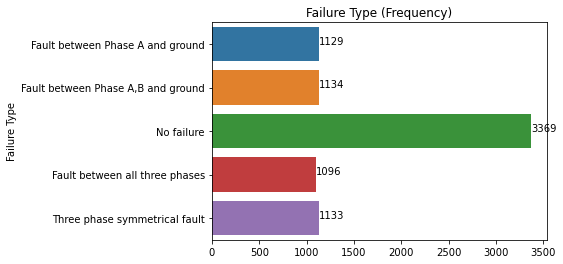

In [6]:
pl2 = sns.countplot(y=ef["Failure Type"])
pl2.set_title("Failure Type (Frequency)")
pl2.set(xlabel=None)
for p in pl2.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        pl2.annotate(percentage, (x, y))
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/unbalancedEF.png') 

The majority of points are classified as No failure. Concerning the Failure Type classification the dataset is imbalanced while regarding the machine status classification the dataset is balanced when the 5 types of faults are considered together. 

In [4]:
le = LabelEncoder()
# categories follow the alphabetic order
# (0):Fault between Phase A and ground
# (1): Fault between Phase A,B and ground
# (2): Fault between all three phases
# (3): No failure 
# (4): Three phase symmetrical fault
ef['Failure Type'] = le.fit_transform(ef.loc[:,["Failure Type"]].values)

/home/nico_ronzo/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


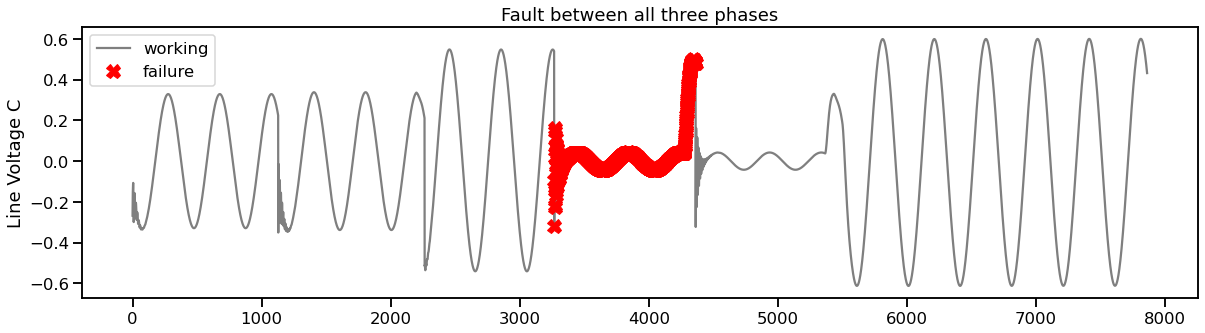

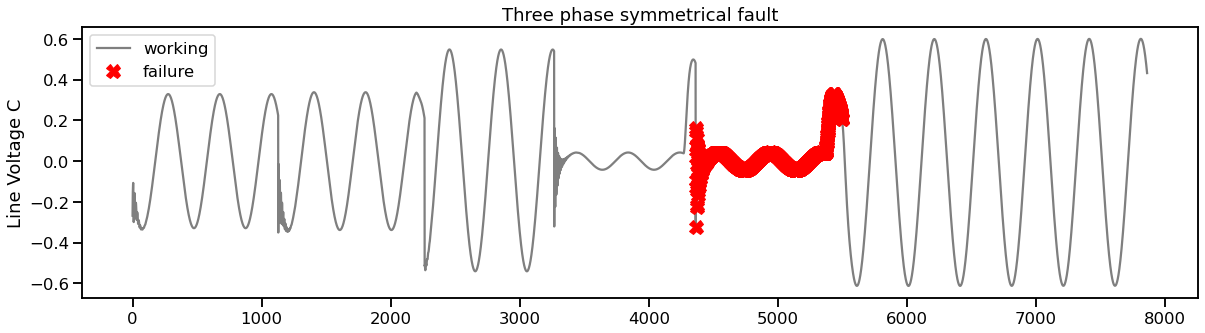

In [8]:
TF=ef[ef['Failure Type']==2]
sns.set_context('talk')
_ = plt.figure(figsize=(20,5))
_ = plt.plot(ef["Vc"], color='black', label='working',alpha=0.5)
_ = plt.plot(TF["Vc"], linestyle='none', marker='X', color='red', markersize=14, label='failure')
_ = plt.ylabel('Line Voltage C')
_ = plt.title('Fault between all three phases')
_ =plt.legend()
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/faultbetweenallthreephasesEF.png')
TF=ef[ef['Failure Type']==4]
sns.set_context('talk')
_ = plt.figure(figsize=(20,5))
_ = plt.plot(ef["Vc"], color='black', label='working',alpha=0.5)
_ = plt.plot(TF["Vc"], linestyle='none', marker='X', color='red', markersize=14, label='failure')
_ = plt.ylabel('Line Voltage C')
_ = plt.title('Three phase symmetrical fault')
_ =plt.legend()
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/threephasesymmetricalfaultEF.png')


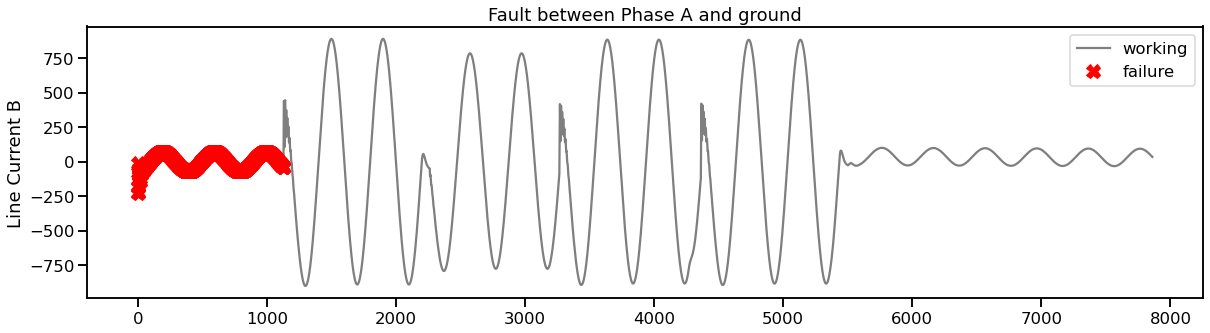

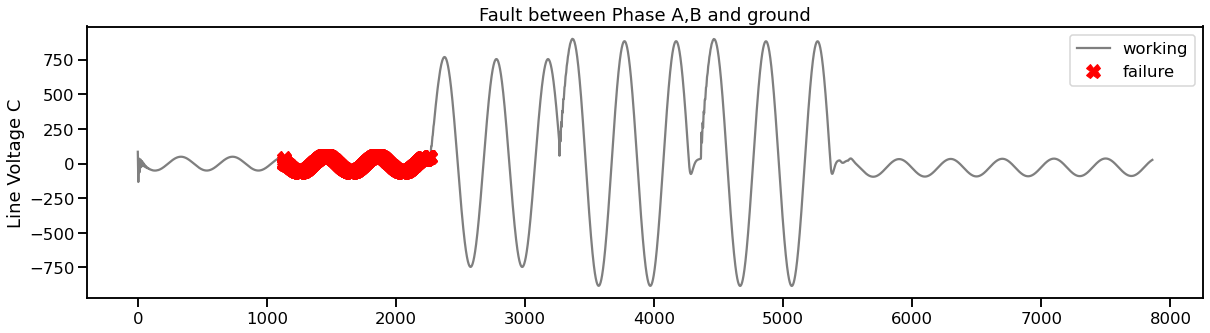

In [9]:
TF=ef[ef['Failure Type']==0]
sns.set_context('talk')
_ = plt.figure(figsize=(20,5))
_ = plt.plot(ef["Ib"], color='black', label='working',alpha=0.5)
_ = plt.plot(TF["Ib"], linestyle='none', marker='X', color='red', markersize=14, label='failure')
_ = plt.ylabel('Line Current B')
_ = plt.title('Fault between Phase A and ground')
_ =plt.legend()
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/faultbetweenphaseaandgroundEF.png')
TF=ef[ef['Failure Type']==1]
sns.set_context('talk')
_ = plt.figure(figsize=(20,5))
_ = plt.plot(ef["Ic"], color='black', label='working',alpha=0.5)
_ = plt.plot(TF["Ic"], linestyle='none', marker='X', color='red', markersize=14, label='failure')
_ = plt.ylabel('Line Voltage C')
_ = plt.title('Fault between Phase A,B and ground')
_ =plt.legend()
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/faultbetweenphaseabandgroundEF.png')

From the graphical assessments the different type of failures seem present in temporal order. Three phase symmetrical fault follows fault between all three phases. Moreover Fault between Phase A,B and ground follows Fault between Phase A and ground. 

In [5]:
# split the data train and test 
split=split_training_testing(ef,0.33)

### Gradient boost classifier

In [19]:
# gradient boost classifier 
params_gb=grid_gbm(split[2],split[4],'micro')

|   iter    |  target   | learni... | max_depth | max_fe... | n_esti... | subsample |
-------------------------------------------------------------------------------------
|  1        |  0.9825   |  0.616    |  3.353    |  0.8872   |  133.8    |  0.8591   |
|  2        |  0.8677   |  0.1577   |  2.18     |  0.884    |  96.71    |  0.8675   |
|  3        |  0.9912   |  0.9908   |  3.902    |  0.8162   |  126.9    |  0.9242   |
|  4        |  0.987    |  0.2815   |  5.73     |  0.8237   |  85.18    |  0.9802   |
|  5        |  1.0      |  0.796    |  8.725    |  0.963    |  149.4    |  0.9155   |
|  6        |  0.9997   |  0.8156   |  5.371    |  0.8055   |  111.8    |  0.8211   |
|  7        |  1.0      |  0.819    |  7.582    |  0.9131   |  99.2     |  0.9997   |
|  8        |  0.9907   |  0.1467   |  6.923    |  0.897    |  108.4    |  0.9456   |
|  9        |  0.9992   |  0.3296   |  5.204    |  0.8638   |  146.3    |  0.9837   |
|  10       |  0.9495   |  0.8157   |  2.273    |  0.9

In [20]:
# predict the class 
classifier = GradientBoostingClassifier(random_state=123, **params_gb)
multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target_classifier.fit(split[2], split[4])
y_pred_test=multi_target_classifier.predict(split[3])

In [21]:
# performance micro
performance_failure_type(split[5],y_pred_test,'micro')

Test Precision (Failure Type)      :  88.09 %
Test Recall (Failure Type)         :  88.09 %
Test F1-Score (Failure Type) :  88.09 %
Test Balanced Accuracy Score (Failure Type): 82.99 %


()

In [22]:
# Performance Metrics macro
performance_failure_type(split[5],y_pred_test,'macro')

Test Precision (Failure Type)      :  82.98 %
Test Recall (Failure Type)         :  82.99 %
Test F1-Score (Failure Type) :  82.96 %
Test Balanced Accuracy Score (Failure Type): 82.99 %


()

In [23]:
# Performance Metrics machine status
performance_machine_status(split[5],y_pred_test)

Test Precision (Machine Status)      :  99.93 %
Test Recall (Machine Status)         :  100.0 %
Test F1-score (Machine Status) :  99.97 %


()

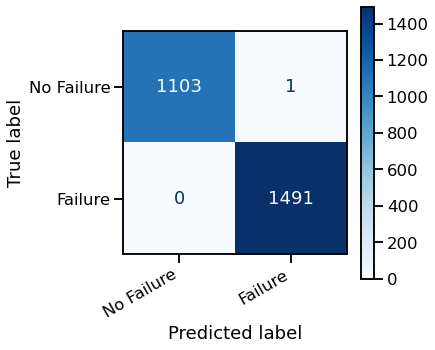

In [24]:
confusion_machine_status(split[5],y_pred_test,)
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/gradientboostmachinestatusEF.png')


The machine status classification is outstanding.

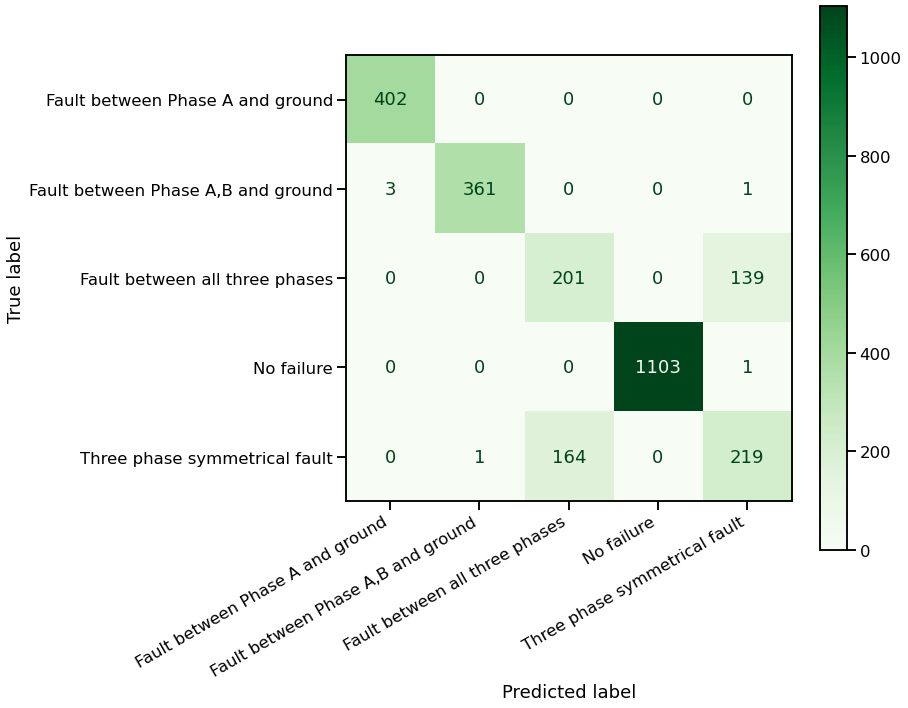

In [25]:
confusion_failure_type(split[5],y_pred_test,['Fault between Phase A and ground','Fault between Phase A,B and ground','Fault between all three phases','No failure','Three phase symmetrical fault'])
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/gradientboostfailuretypeEF.png')


The failure type classification outstands for three categories, while for Fault between all three phases and three phase symmetrical fault the  accuracy of the classification does not exceed 60%. 

### Adaboost classifier

In [26]:
# Ada boost classifier 
params_ab=grid_abm(split[2],split[4],'micro')

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  1        |  0.6628   |  0.616    |  91.83    |
|  2        |  0.6867   |  0.4417   |  133.8    |
|  3        |  0.6912   |  0.3024   |  90.44    |
|  4        |  0.7311   |  0.03225  |  109.4    |
|  5        |  0.7069   |  0.2463   |  103.6    |
|  6        |  0.6117   |  0.9908   |  96.64    |
|  7        |  0.7277   |  0.09038  |  126.9    |
|  8        |  0.6003   |  0.625    |  99.2     |
|  9        |  0.7243   |  0.4716   |  88.29    |
|  10       |  0.7309   |  0.08322  |  143.1    |
|  11       |  0.7226   |  0.796    |  138.8    |
|  12       |  0.7012   |  0.8171   |  149.4    |
|  13       |  0.686    |  0.5815   |  137.0    |
|  14       |  0.7267   |  0.4271   |  81.92    |
|  15       |  0.6498   |  0.4596   |  87.37    |
|  16       |  0.6633   |  0.819    |  128.8    |
|  17       |  0.6622   |  0.5696   |  99.2     |
|  18       |  0.6264   |  0.9985   |  89.66    |


In [27]:
# predict test labels 
classifier = AdaBoostClassifier(random_state=123, **params_ab)
multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target_classifier.fit(split[2],split[4])
y_pred_test=multi_target_classifier.predict(split[3])

In [28]:
# Performance Metrics micro
performance_failure_type(split[5],y_pred_test,'micro')

Test Precision (Failure Type)      :  82.89 %
Test Recall (Failure Type)         :  82.89 %
Test F1-Score (Failure Type) :  82.89 %
Test Balanced Accuracy Score (Failure Type): 75.17 %


()

In [29]:
# Performance Metrics micro
performance_failure_type(split[5],y_pred_test,'macro')

Test Precision (Failure Type)      :  76.75 %
Test Recall (Failure Type)         :  75.17 %
Test F1-Score (Failure Type) :  73.87 %
Test Balanced Accuracy Score (Failure Type): 75.17 %


()

In [30]:
# Performance Metrics Machine Status
performance_machine_status(split[5],y_pred_test)

Test Precision (Machine Status)      :  99.93 %
Test Recall (Machine Status)         :  97.25 %
Test F1-score (Machine Status) :  98.57 %


()

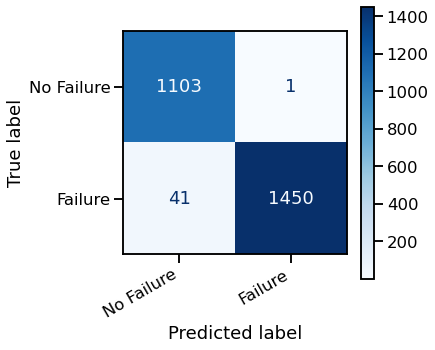

In [31]:
confusion_machine_status(split[5],y_pred_test,)
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/adaboostmachinestatusEF.png')


The machine status classification works well, with respect to gradient boost classifier there is an increase in the undetected failure (True Failure which are predicted as no failure).

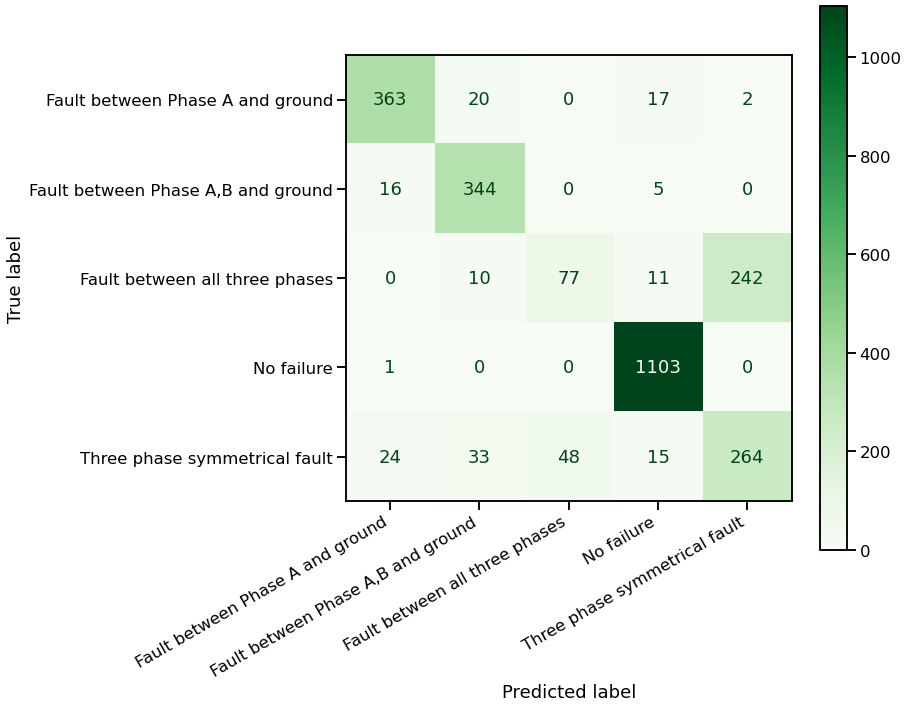

In [32]:
confusion_failure_type(split[5],y_pred_test,['Fault between Phase A and ground','Fault between Phase A,B and ground','Fault between all three phases','No failure','Three phase symmetrical fault'])
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/adaboostfailuretypeEF.png')


The failure type classification works well apart from the Fault between all three phases which goes fully undetected. As in gradient boost classifier misclassification is due to misleading betweeen fault between all three phases and three phase symmetrical fault. 

### Random forest 

In [33]:
# random forest
params_rf=grid_rfm(split[2],split[4],'micro')

|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
|  1        |  0.8295   |  7.285    |  0.8338   |  110.5    |
|  2        |  0.8585   |  8.385    |  0.8591   |  90.44    |
|  3        |  0.6506   |  3.157    |  0.884    |  96.71    |
|  4        |  0.7621   |  5.364    |  0.9981   |  96.64    |
|  5        |  0.6392   |  3.568    |  0.9339   |  123.5    |
|  6        |  0.7225   |  4.92     |  0.8932   |  88.29    |
|  7        |  0.6387   |  3.518    |  0.9802   |  135.6    |
|  8        |  0.8624   |  8.884    |  0.963    |  149.4    |
|  9        |  0.8292   |  7.041    |  0.9628   |  109.5    |
|  10       |  0.6527   |  3.192    |  0.8908   |  87.37    |
|  11       |  0.8611   |  8.721    |  0.9395   |  119.6    |
|  12       |  0.722    |  4.92     |  0.9997   |  89.66    |
|  13       |  0.8271   |  7.308    |  0.897    |  108.4    |
|  14       |  0.8582   |  8.095    |  0.8646   |  108.0    |
|  15   

In [34]:
# predict test labels
classifier = RandomForestClassifier(random_state=123,**params_rf)
multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target_classifier.fit(split[2], split[4])
y_pred_test=multi_target_classifier.predict(split[3])

In [35]:
# Performance Metrics micro
performance_failure_type(split[5],y_pred_test,'micro')

Test Precision (Failure Type)      :  84.39 %
Test Recall (Failure Type)         :  84.39 %
Test F1-Score (Failure Type) :  84.39 %
Test Balanced Accuracy Score (Failure Type): 77.78 %


()

In [36]:
# Performance Metrics macro
performance_failure_type(split[5],y_pred_test,'macro')

Test Precision (Failure Type)      :  77.79 %
Test Recall (Failure Type)         :  77.78 %
Test F1-Score (Failure Type) :  77.68 %
Test Balanced Accuracy Score (Failure Type): 77.78 %


()

In [37]:
# Performance Metrics Machine Status
performance_machine_status(split[5],y_pred_test)

Test Precision (Machine Status)      :  99.87 %
Test Recall (Machine Status)         :  99.87 %
Test F1-score (Machine Status) :  99.87 %


()

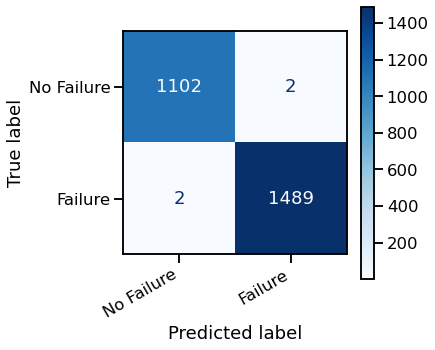

In [38]:
# Confusion Matrix
confusion_machine_status(split[5],y_pred_test,)
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/randomforestmachinestatusEF.png')

Machine status classification is outstanding as in case of gradient boost classifier. 

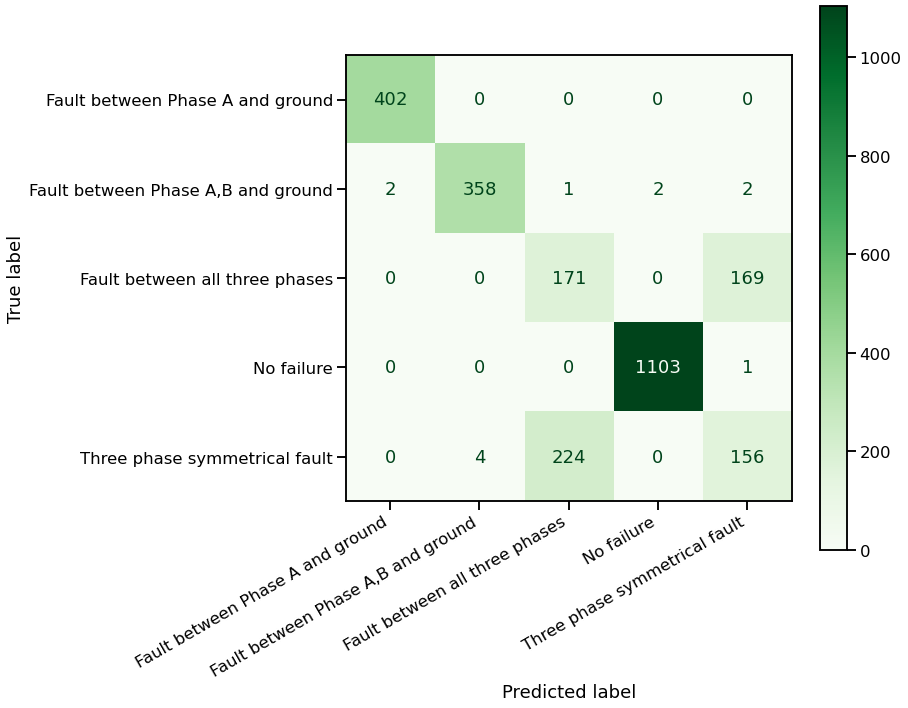

In [39]:
confusion_failure_type(split[5],y_pred_test,['Fault between Phase A and ground','Fault between Phase A,B and ground','Fault between all three phases','No failure','Three phase symmetrical fault'])
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/randomforestfailuretypeEF.png')

The main problem in the fault type classification regards again Three phase symmetrical fault and fault between all three phases. The majority of three phase symmetrical fault are classified as fault between all three phases.

### MLP classifier

In [6]:
# neural network
params_mlp=grid_nn_ef(split[2],split[4],'micro')

|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... |  layers   | max_iter  | momentum  | neurons1  | neurons2  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7511   |  2.443    |  0.001699 |  232.3    |  1.531    |  0.883    |  1.297    |  1.004e+0 |  0.4202   |  8.148    |  5.688    |  1.972    |  0.2353   |


/home/nico_ronzo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/home/nico_ronzo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


|  2        |  0.2      |  0.324    |  0.006699 |  324.1    |  0.5458   |  1.394    |  1.236    |  1.015e+0 |  0.9008   |  13.15    |  8.203    |  1.622    |  0.981    |
|  3        |  0.2      |  2.303    |  0.00814  |  225.0    |  0.05462  |  1.358    |  1.21     |  1.163e+0 |  0.6977   |  11.09    |  5.371    |  1.987    |  0.1367   |
|  4        |  0.7174   |  2.456    |  0.004856 |  216.9    |  1.448    |  0.9652   |  1.797    |  1.064e+0 |  0.9472   |  14.27    |  8.069    |  0.06781  |  0.9339   |
|  5        |  0.18     |  3.792    |  0.008068 |  254.7    |  1.924    |  1.247    |  1.634    |  1.003e+0 |  0.03818  |  6.478    |  4.64     |  0.06643  |  0.2242   |
|  6        |  0.2      |  2.17     |  0.001794 |  105.0    |  0.2977   |  2.042    |  1.933    |  1.154e+0 |  0.6688   |  9.971    |  6.976    |  0.9187   |  0.9536   |
|  7        |  0.2      |  0.5898   |  0.009069 |  263.0    |  1.179    |  2.047    |  1.353    |  1.173e+0 |  0.4821   |  6.624    |  5.824    |  0.7

/home/nico_ronzo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/home/nico_ronzo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


|  11       |  0.2      |  2.537    |  0.004596 |  280.0    |  0.7011   |  1.973    |  1.948    |  1.091e+0 |  0.1248   |  9.712    |  5.365    |  0.69     |  0.9646   |
|  12       |  0.2      |  0.8602   |  0.006832 |  31.78    |  1.662    |  2.098    |  2.922    |  1.118e+0 |  0.2173   |  12.47    |  4.154    |  0.8332   |  0.2784   |
|  13       |  0.2937   |  0.4239   |  0.004269 |  432.9    |  0.2197   |  2.95     |  1.464    |  1.144e+0 |  0.6609   |  6.7      |  7.486    |  0.528    |  0.8928   |
|  14       |  0.221    |  3.265    |  0.003998 |  422.9    |  0.3937   |  1.562    |  1.821    |  1.185e+0 |  0.8254   |  10.51    |  4.584    |  0.02307  |  0.904    |
|  15       |  0.7624   |  2.044    |  0.008432 |  63.04    |  1.599    |  0.1861   |  2.265    |  1.194e+0 |  0.3974   |  11.94    |  5.074    |  1.771    |  0.9768   |
|  16       |  0.2      |  2.947    |  0.006418 |  141.1    |  0.9469   |  0.8015   |  2.728    |  1.053e+0 |  0.973    |  7.922    |  5.489    |  1.4

/home/nico_ronzo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/home/nico_ronzo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


|  30       |  0.2      |  3.868    |  0.008175 |  393.7    |  0.9719   |  0.3754   |  1.587    |  1.005e+0 |  0.0807   |  6.38     |  6.276    |  0.06192  |  0.9514   |
|  31       |  0.647    |  3.939    |  0.008946 |  138.1    |  1.201    |  0.6742   |  2.348    |  1.176e+0 |  0.7137   |  13.57    |  5.428    |  0.7411   |  0.7837   |
|  32       |  0.7607   |  1.047    |  0.003182 |  147.6    |  1.339    |  2.75     |  1.589    |  1.176e+0 |  0.1556   |  14.95    |  7.408    |  1.929    |  0.09916  |
|  33       |  0.7192   |  3.99     |  1e-05    |  237.9    |  1.068    |  1.523    |  1.0      |  1.005e+0 |  0.6821   |  6.457    |  7.166    |  1.99     |  0.04155  |
|  34       |  0.2219   |  0.08769  |  0.004644 |  150.5    |  0.7458   |  0.281    |  2.599    |  1.178e+0 |  0.5516   |  10.88    |  5.022    |  0.4504   |  0.06841  |
|  35       |  0.2      |  0.6199   |  0.006661 |  140.5    |  1.284    |  0.8909   |  1.009    |  1.175e+0 |  0.3475   |  13.44    |  6.659    |  0.2

In [7]:
classifier = MLPClassifier(random_state=123,**params_mlp)
multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target_classifier.fit(split[2], split[4])
y_pred_test=multi_target_classifier.predict(split[3])

In [8]:
# Performance Metrics micro
performance_failure_type(split[5],y_pred_test,'micro')

Test Precision (Failure Type)      :  84.39 %
Test Recall (Failure Type)         :  84.39 %
Test F1-Score (Failure Type) :  84.39 %
Test Balanced Accuracy Score (Failure Type): 77.87 %


()

In [9]:
# Performance Metrics macro
performance_failure_type(split[5],y_pred_test,'macro')

Test Precision (Failure Type)      :  77.37 %
Test Recall (Failure Type)         :  77.87 %
Test F1-Score (Failure Type) :  77.42 %
Test Balanced Accuracy Score (Failure Type): 77.87 %


()

In [10]:
# Performance Metrics Machine Status
performance_machine_status(split[5],y_pred_test)

Test Precision (Machine Status)      :  98.4 %
Test Recall (Machine Status)         :  98.93 %
Test F1-score (Machine Status) :  98.66 %


()

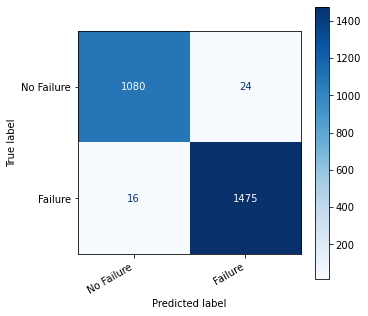

In [11]:
# Confusion Matrix
confusion_machine_status(split[5],y_pred_test,)
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/nnmachinestatusEF.png')

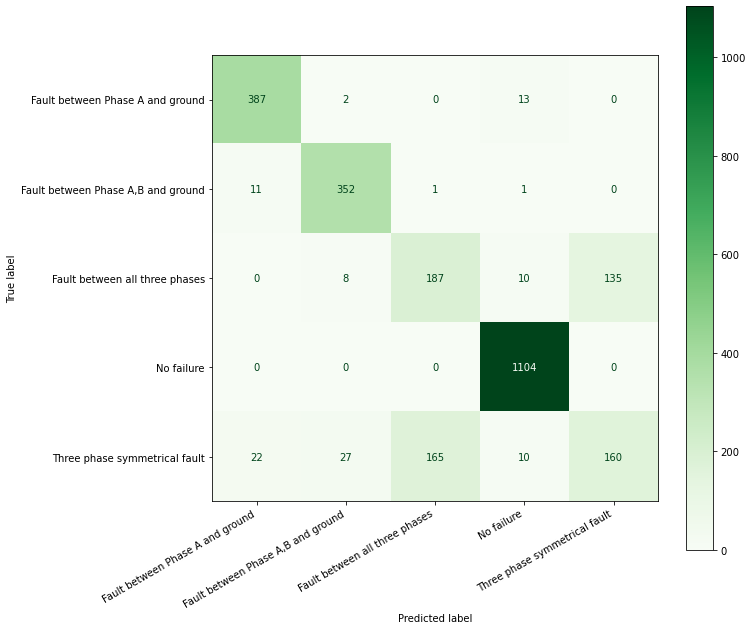

In [12]:
confusion_failure_type(split[5],y_pred_test,['Fault between Phase A and ground','Fault between Phase A,B and ground','Fault between all three phases','No failure','Three phase symmetrical fault'])
plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/nnfailuretypeEF.png')